## Итоговая работа по модулю "Аналитика Big Data" от 15.12.2019 г.
ФИО: Кривова Татьяна Сергеевна

Скачайте датасет MovieLens 100K к себе на компьютер: https://grouplens.org/datasets/movielens/100k/

**1.1. Построить гистограмму пользователей по возрасту.**

In [1]:
import pandas as pd
import numpy as np

from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
users_df = pd.read_csv('u.user.csv', sep='|', header=None) # users_df.shape --> (943, 5)
users_df.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

In [3]:
users_df.info() # отсутствующих значений нет
users_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 25.8+ KB


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [4]:
print(f'Значения для колонки age:\n\n{users_df.age.describe()}')

Значения для колонки age:

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64


Text(0.5, 1.0, 'График для параметра age: гистограмма пользователей по возрасту')

Text(0.5, 0, 'Возраст')

Text(0, 0.5, 'Количество элементов')

(5, 75)

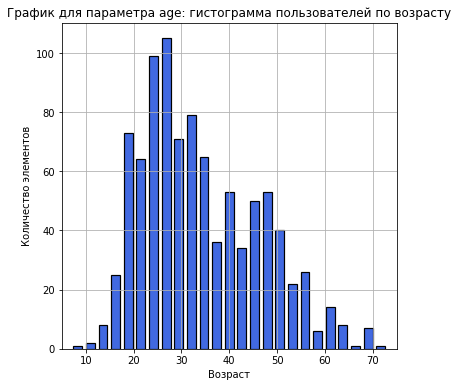

In [5]:
rcParams['figure.figsize'] = 6,6

users_df.age.hist(bins=25, edgecolor='black', linewidth=1.2, align='mid', rwidth=0.7, color='royalblue')

plt.title('График для параметра age: гистограмма пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество элементов')
plt.grid(True)
plt.xlim(5,75)

**1.2. Построить 2 графика, показывающих распределение людей по профессиям в зависимости от их пола.**

In [6]:
len(users_df.occupation.unique())
users_df.occupation.unique()

21

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

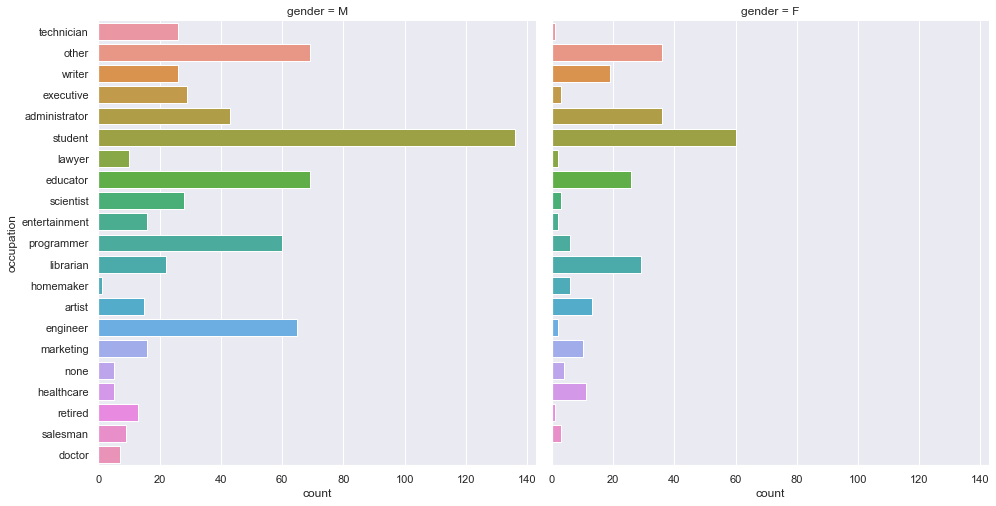

In [7]:
# Распределение пользователей по профессиям в зависимости от пола (sns.catplot)

sns.set(style="darkgrid")
sns.catplot(y='occupation', data=users_df, col="gender", kind="count", height=7)

In [8]:
M_occupations = users_df[users_df.gender == 'M'].occupation.value_counts()
F_occupations = users_df[users_df.gender == 'F'].occupation.value_counts()

In [9]:
M_df = M_occupations.to_frame(name='M_count').reset_index()
F_df = F_occupations.to_frame(name='F_count').reset_index()

<BarContainer object of 21 artists>

Text(0.5, 1.0, 'Распределение пользователей-мужчин по профессиям')

Text(0, 0.5, 'Количество')

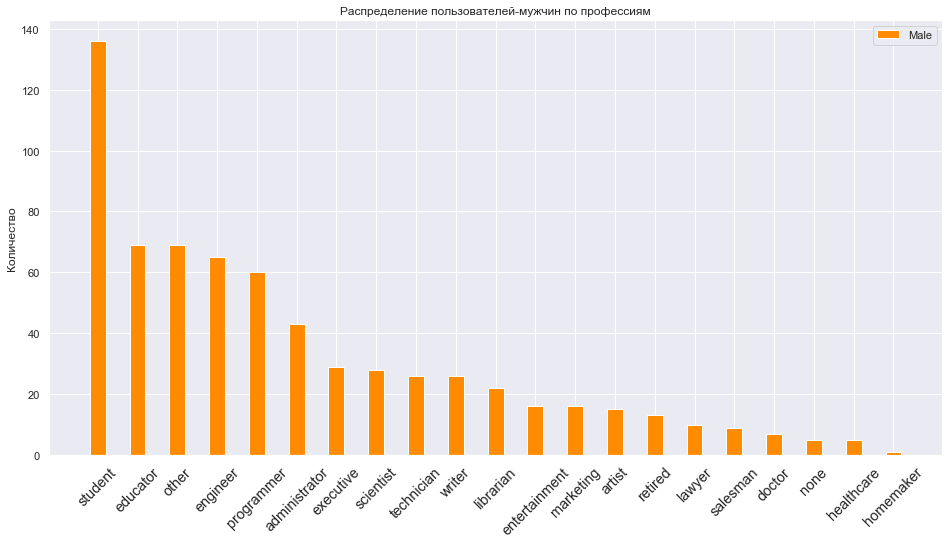

In [10]:
rcParams['figure.figsize'] = 16,8

plt.bar(M_df['index'], M_df['M_count'], width=0.4, align='center', tick_label=M_df['index'],\
        color="darkorange", label='Male')

plt.tick_params(axis='x', labelrotation=45, direction='out', labelsize='large')

plt.title('Распределение пользователей-мужчин по профессиям')
plt.legend()
plt.ylabel('Количество')

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Распределение пользователей-женщин по профессиям')

Text(0, 0.5, 'Количество')

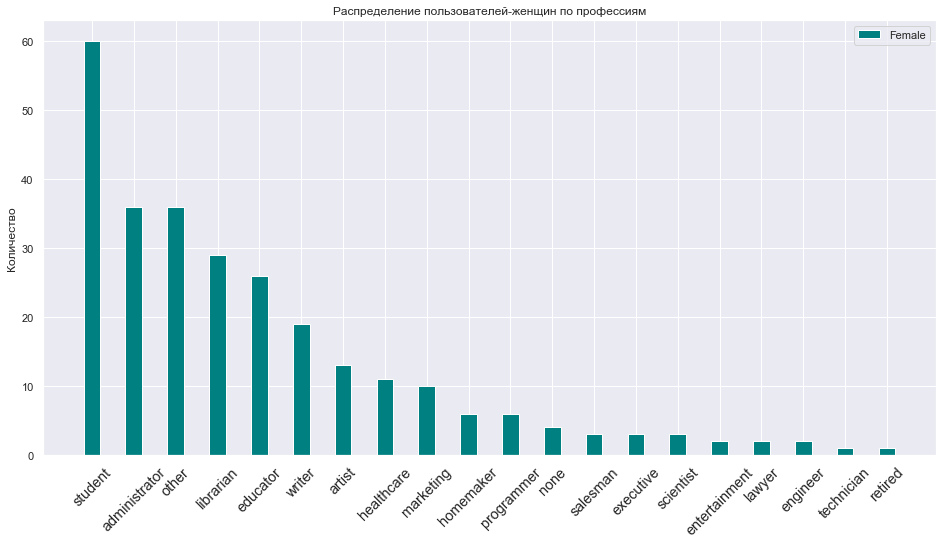

In [11]:
rcParams['figure.figsize'] = 16,8

plt.bar(F_df['index'], F_df['F_count'], width=0.4, align='center', tick_label=F_df['index'],\
        color="teal", label='Female')

plt.tick_params(axis='x', labelrotation=45, direction='out', labelsize='large')

plt.title('Распределение пользователей-женщин по профессиям')
plt.legend()
plt.ylabel('Количество')

**1.3. Построить график количества фильмов по жанрам.**

In [12]:
films_df = pd.read_csv('u.item.csv', sep='|', encoding = "ISO-8859-1", header=None) # films_df.shape --> (1682, 24)
films_df.columns = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [13]:
films_df.info() # есть отсутствующие значения
films_df.head(10)

films_df.isna().sum() # Количество отсутствующих значений в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie id              1682 non-null int64
movie title           1682 non-null object
release date          1681 non-null object
video release date    0 non-null float64
IMDb URL              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Children's            1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


movie id                 0
movie title              0
release date             1
video release date    1682
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [14]:
genres = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
dictionary = {}

In [15]:
for indx, element in films_df.items():
    if indx in genres: dictionary[indx] = sum(element)

dictionary

{'unknown': 2,
 'Action': 251,
 'Adventure': 135,
 'Animation': 42,
 "Children's": 122,
 'Comedy': 505,
 'Crime': 109,
 'Documentary': 50,
 'Drama': 725,
 'Fantasy': 22,
 'Film-Noir': 24,
 'Horror': 92,
 'Musical': 56,
 'Mystery': 61,
 'Romance': 247,
 'Sci-Fi': 101,
 'Thriller': 251,
 'War': 71,
 'Western': 27}

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'График количества фильмов по жанрам')

Text(0, 0.5, 'Количество')

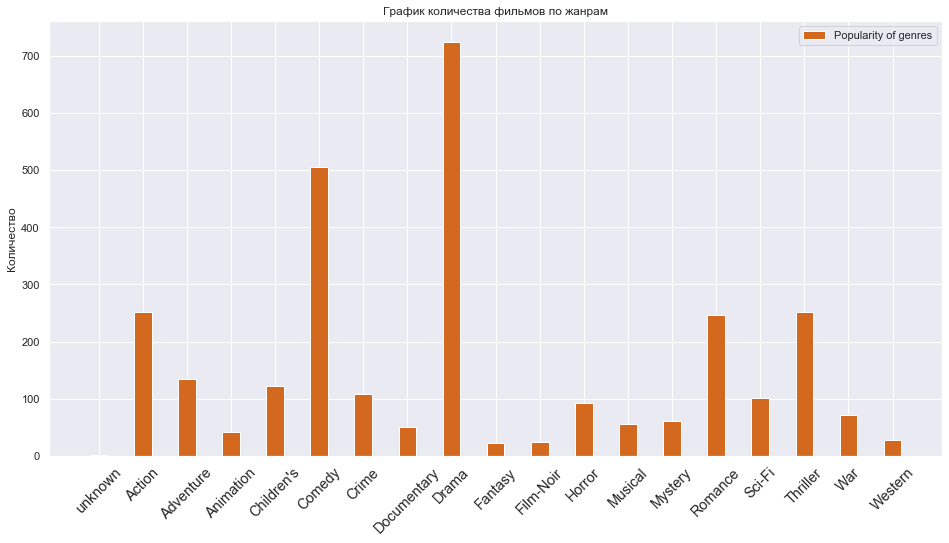

In [16]:
rcParams['figure.figsize'] = 16,8

plt.bar(dictionary.keys(), dictionary.values(), width=0.4, align='center',\
        color="chocolate", label='Popularity of genres')

plt.tick_params(axis='x', labelrotation=45, direction='out', labelsize='large')

plt.title('График количества фильмов по жанрам')
plt.legend()
plt.ylabel('Количество')

In [17]:
from operator import itemgetter
list_sorted = sorted(dictionary.items(), key=itemgetter(1), reverse=True)
dic_sorted = {}

In [18]:
for element in list_sorted:
    dic_sorted[element[0]] = element[1]
dic_sorted  

{'Drama': 725,
 'Comedy': 505,
 'Action': 251,
 'Thriller': 251,
 'Romance': 247,
 'Adventure': 135,
 "Children's": 122,
 'Crime': 109,
 'Sci-Fi': 101,
 'Horror': 92,
 'War': 71,
 'Mystery': 61,
 'Musical': 56,
 'Documentary': 50,
 'Animation': 42,
 'Western': 27,
 'Film-Noir': 24,
 'Fantasy': 22,
 'unknown': 2}

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'График количества фильмов по жанрам')

Text(0, 0.5, 'Количество')

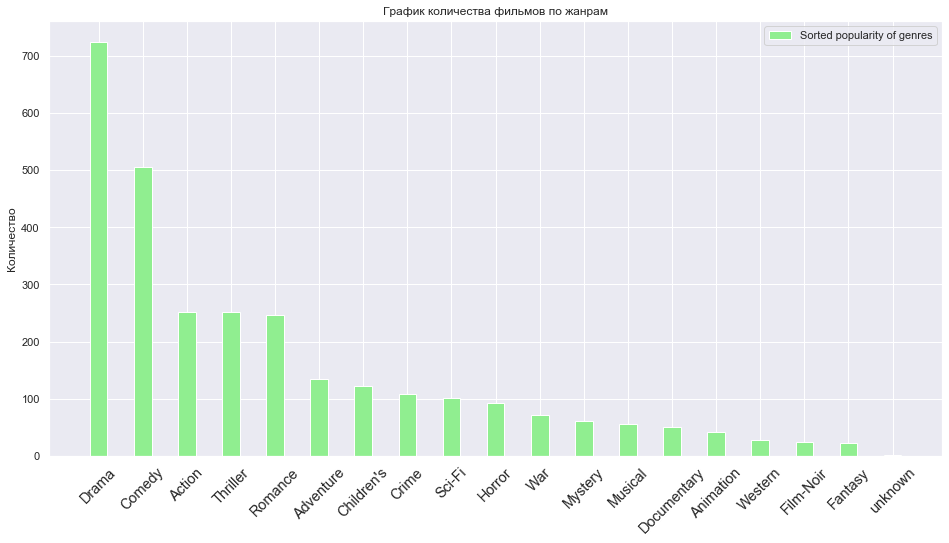

In [19]:
rcParams['figure.figsize'] = 16,8

plt.bar(dic_sorted.keys(), dic_sorted.values(), width=0.4, align='center',\
        color="lightgreen", label='Sorted popularity of genres')

plt.tick_params(axis='x', labelrotation=45, direction='out', labelsize='large')

plt.title('График количества фильмов по жанрам')
plt.legend()
plt.ylabel('Количество')

**1.4. Построить график количества фильмов по годам.**

In [20]:
# Посмотрим, у какого фильма отсутствует информация в столбце release date

films_df[films_df['release date'].isna()] # Удаляю эту строку

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
films_df.drop(index=266, inplace=True)

In [22]:
len(films_df['release date'].unique())

years = []
for line in films_df['release date']:
    years.append(int(line[7:]))

240

In [23]:
len(years)

min(years) # Разберемся, почему странное значение года. Вероятно, пропущена 1 в начале
max(years)

years.index(971)

1681

971

1998

1371

In [24]:
films_df.loc[1371:1373,:]

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1372,"Stranger, The (1994)",01-Jan-1994,NaN,"http://us.imdb.com/Title?Stranger,+The+(1994/II)",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1373,Good Morning (1971),4-Feb-1971,NaN,http://us.imdb.com/M/title-exact?Good%20Mornin...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1373,1374,Falling in Love Again (1980),01-Jan-1980,NaN,http://us.imdb.com/M/title-exact?Falling%20in%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
years[1371] = 1971 # Исправили

len(years)

min(years)
max(years)

1681

1922

1998

In [26]:
films_df['year'] = np.array(years)
films_df.head(25) # Проверим корректность  

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1995
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1996


In [27]:
years_nums = films_df.year.value_counts()

In [28]:
years_nums_df = years_nums.to_frame(name='nums').reset_index()
years_nums_df

,index,nums
0,1996,355
1,1997,286
2,1995,219
3,1994,214
4,1993,126
5,1998,65
6,1992,37
7,1990,24
8,1991,22
9,1989,15


In [29]:
years_nums_df.sort_values(by='index', ascending=True, inplace=True)
years_nums_df.head(10)

,index,nums
70,1922,1
69,1926,1
68,1930,1
67,1931,1
66,1932,1
65,1933,2
52,1934,4
51,1935,4
62,1936,2
50,1937,4


Text(0.5, 1.0, 'График количества фильмов по годам, 1922 - 1996 гг.')

Text(0, 0.5, 'Количество')

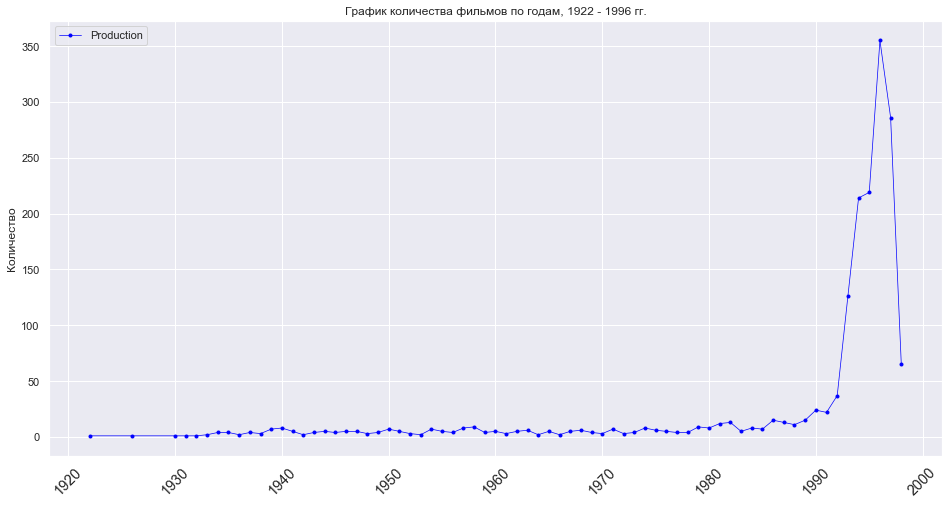

In [31]:
rcParams['figure.figsize'] = 16,8

plt.plot(years_nums_df['index'], years_nums_df['nums'], color="blue", marker="o", markersize=3, linewidth=0.7, label='Production')

plt.tick_params(axis='x', labelrotation=45, direction='out', which='both', labelsize='large')

plt.title('График количества фильмов по годам, 1922 - 1996 гг.')
plt.grid(True)
plt.legend()
plt.ylabel('Количество')

In [32]:
df_filtered = years_nums_df[years_nums_df['index']>=1985]
df_filtered.shape

(14, 2)

Text(0.5, 1.0, 'График количества фильмов по годам, 1985 - 1996 гг.')

Text(0, 0.5, 'Количество')

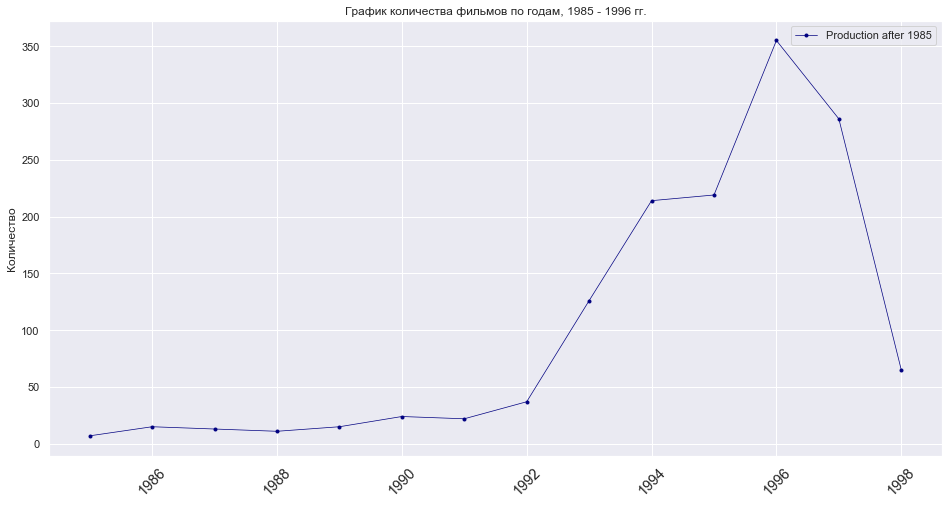

In [34]:
plt.plot(df_filtered['index'], df_filtered['nums'], color="navy", marker="o", markersize=3, linewidth=0.7, label='Production after 1985')

plt.tick_params(axis='x', labelrotation=45, direction='out', which='both', labelsize='large')

plt.title('График количества фильмов по годам, 1985 - 1996 гг.')
plt.grid(True)
plt.legend()
plt.ylabel('Количество')

**1.5. Построить график количества оценок по месяцам и годам.** (преобразование timestamp в дату см тут https://stackoverflow.com/questions/45227380/convert-unix-epoch-time-to-date-in-google-sheets)

In [35]:
full_df = pd.read_csv('u.data.csv', sep='\t', header=None) # full_df.shape --> (100000, 4)
full_df.columns = ['user id', 'item id', 'rating', 'timestamp']

In [36]:
full_df.info() # отсутствующих значений нет
full_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
item id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [37]:
from datetime import datetime

days_str = []

for element in full_df.timestamp:
    utc_time = datetime.utcfromtimestamp(element)
    days_str.append(utc_time.strftime("%Y-%m-%d %H:%M:%S.%f+00:00 (UTC)")[0:10])

In [38]:
full_df['date_str'] = np.array(days_str)

In [39]:
full_df['Day'] = pd.to_datetime(full_df['date_str'], yearfirst=True)

In [40]:
full_df['x_label'] = full_df.apply(lambda row: row.Day.strftime("%b-%Y"), axis=1)

In [41]:
full_df.head(10)
full_df.info()

,user id,item id,rating,timestamp,date_str,Day,x_label
0,196,242,3,881250949,1997-12-04,1997-12-04,Dec-1997
1,186,302,3,891717742,1998-04-04,1998-04-04,Apr-1998
2,22,377,1,878887116,1997-11-07,1997-11-07,Nov-1997
3,244,51,2,880606923,1997-11-27,1997-11-27,Nov-1997
4,166,346,1,886397596,1998-02-02,1998-02-02,Feb-1998
5,298,474,4,884182806,1998-01-07,1998-01-07,Jan-1998
6,115,265,2,881171488,1997-12-03,1997-12-03,Dec-1997
7,253,465,5,891628467,1998-04-03,1998-04-03,Apr-1998
8,305,451,3,886324817,1998-02-01,1998-02-01,Feb-1998
9,6,86,3,883603013,1997-12-31,1997-12-31,Dec-1997


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
user id      100000 non-null int64
item id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
date_str     100000 non-null object
Day          100000 non-null datetime64[ns]
x_label      100000 non-null object
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 4.6+ MB


In [42]:
marks = full_df.x_label.value_counts()

In [43]:
marks_df = marks.to_frame(name='nums').reset_index()
marks_df

,index,nums
0,Nov-1997,23980
1,Jan-1998,14095
2,Mar-1998,12656
3,Dec-1997,11911
4,Feb-1998,10991
5,Oct-1997,10304
6,Apr-1998,9359
7,Sep-1997,6704


In [44]:
days_to_add = ['1997-11-01', '1998-01-01', '1998-03-01', '1997-12-01', '1998-02-01', '1997-10-01', '1998-04-01', '1997-09-01']

marks_df['Days_str'] = np.array(days_to_add)

In [45]:
marks_df['Day_to_sort'] = pd.to_datetime(marks_df['Days_str'], yearfirst=True)

In [46]:
marks_df
marks_df.info()

,index,nums,Days_str,Day_to_sort
0,Nov-1997,23980,1997-11-01,1997-11-01
1,Jan-1998,14095,1998-01-01,1998-01-01
2,Mar-1998,12656,1998-03-01,1998-03-01
3,Dec-1997,11911,1997-12-01,1997-12-01
4,Feb-1998,10991,1998-02-01,1998-02-01
5,Oct-1997,10304,1997-10-01,1997-10-01
6,Apr-1998,9359,1998-04-01,1998-04-01
7,Sep-1997,6704,1997-09-01,1997-09-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
index          8 non-null object
nums           8 non-null int64
Days_str       8 non-null object
Day_to_sort    8 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 256.0+ bytes


In [47]:
marks_df.sort_values(by='Day_to_sort', ascending=True, inplace=True)
marks_df.head(10)

,index,nums,Days_str,Day_to_sort
7,Sep-1997,6704,1997-09-01,1997-09-01
5,Oct-1997,10304,1997-10-01,1997-10-01
0,Nov-1997,23980,1997-11-01,1997-11-01
3,Dec-1997,11911,1997-12-01,1997-12-01
1,Jan-1998,14095,1998-01-01,1998-01-01
4,Feb-1998,10991,1998-02-01,1998-02-01
2,Mar-1998,12656,1998-03-01,1998-03-01
6,Apr-1998,9359,1998-04-01,1998-04-01


<BarContainer object of 8 artists>

Text(0.5, 1.0, 'График количества оценок по месяцам и годам')

Text(0, 0.5, 'Количество')

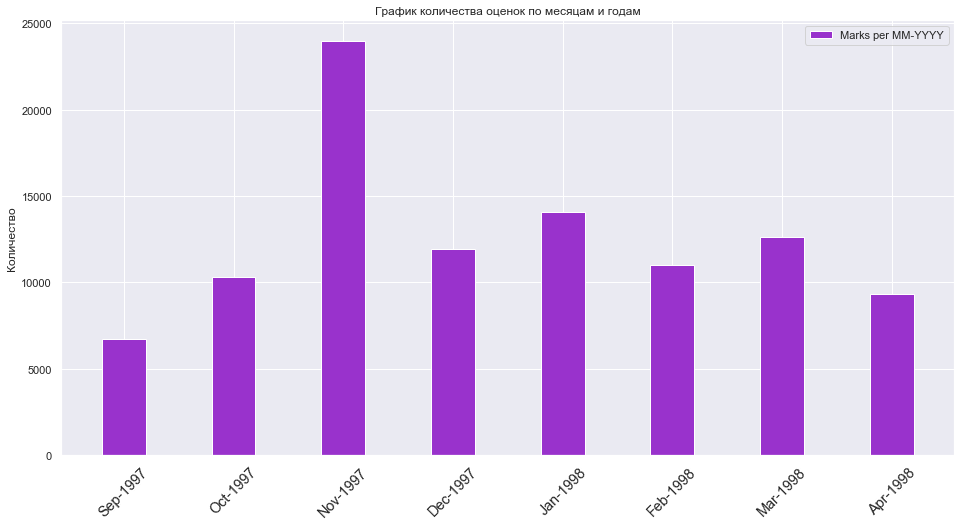

In [49]:
rcParams['figure.figsize'] = 16,8

plt.bar(marks_df['index'], marks_df['nums'], width=0.4, align='center',\
        color="darkorchid", label='Marks per MM-YYYY')

plt.tick_params(axis='x', labelrotation=45, direction='out', labelsize='large')

plt.title('График количества оценок по месяцам и годам')
plt.grid(True)
plt.legend()
plt.ylabel('Количество')

**1.6. Выявить top-5 самых активных пользователей (больше всего оценок) за последние 3 месяца.**

In [50]:
# Последние 3 месяца - это Feb, Mar, Apr 1998. Ранее уже подготовлен датафрейм full_df:

full_df.head(10)
full_df.info()

,user id,item id,rating,timestamp,date_str,Day,x_label
0,196,242,3,881250949,1997-12-04,1997-12-04,Dec-1997
1,186,302,3,891717742,1998-04-04,1998-04-04,Apr-1998
2,22,377,1,878887116,1997-11-07,1997-11-07,Nov-1997
3,244,51,2,880606923,1997-11-27,1997-11-27,Nov-1997
4,166,346,1,886397596,1998-02-02,1998-02-02,Feb-1998
5,298,474,4,884182806,1998-01-07,1998-01-07,Jan-1998
6,115,265,2,881171488,1997-12-03,1997-12-03,Dec-1997
7,253,465,5,891628467,1998-04-03,1998-04-03,Apr-1998
8,305,451,3,886324817,1998-02-01,1998-02-01,Feb-1998
9,6,86,3,883603013,1997-12-31,1997-12-31,Dec-1997


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
user id      100000 non-null int64
item id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
date_str     100000 non-null object
Day          100000 non-null datetime64[ns]
x_label      100000 non-null object
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 4.6+ MB


In [51]:
three_months = ['Feb-1998', 'Mar-1998', 'Apr-1998']

filtered_data = full_df.loc[full_df['x_label'].isin(three_months)]

In [52]:
top_users = filtered_data['user id'].value_counts()

In [53]:
top_users_df = top_users.to_frame(name='nums').reset_index()
top_users_df.head()

,index,nums
0,655,685
1,234,480
2,393,448
3,7,403
4,682,399


In [54]:
print(f'top-5 самых активных пользователей (user id): {list(top_users_df["index"][0:5])}')

top-5 самых активных пользователей (user id): [655, 234, 393, 7, 682]


**2.1. Загрузите файлы по оценкам (ratings) и фильмам (movies) и создайте на их основе pandas-датафреймы.**

In [55]:
ratings_df = pd.read_csv('u.data.csv', sep='\t', header=None) # ratings_df.shape --> (100000, 4)
ratings_df.columns = ['user id', 'item id', 'rating', 'timestamp']

In [56]:
ratings_df.info() # В датафрейме ratings_df отсутствующих значений нет
ratings_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
item id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [57]:
movies_df = pd.read_csv('u.item.csv', sep='|', encoding = "ISO-8859-1", header=None) # movies_df.shape --> (1682, 24)
movies_df.columns = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [58]:
movies_df.info() # В датафрейме movies_df есть отсутствующие значения
movies_df.head(10)

movies_df.isna().sum() # Количество отсутствующих значений в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie id              1682 non-null int64
movie title           1682 non-null object
release date          1681 non-null object
video release date    0 non-null float64
IMDb URL              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Children's            1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


movie id                 0
movie title              0
release date             1
video release date    1682
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

**2.2. Средствами Pandas, используя dataframe ratings, найдите id пользователя, поставившего больше всего оценок.**

In [59]:
active_users = ratings_df['user id'].value_counts()
active_users

405    737
655    685
13     636
450    540
276    518
      ... 
147     20
19      20
572     20
636     20
895     20
Name: user id, Length: 943, dtype: int64

In [60]:
active_users_df = active_users.to_frame(name='nums').reset_index()
print(f'Самый активный пользователь (user id): {list(active_users_df["index"])[0]}')

Самый активный пользователь (user id): 405


**2.3. Оставьте в датафрейме ratings только те фильмы, которые оценил данный пользователь.**

In [61]:
ratings_filtered = ratings_df[ratings_df['user id'] == 405] # ratings_filtered.shape --> (737, 4)

In [62]:
ratings_filtered.info()
ratings_filtered.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 12276 to 99756
Data columns (total 4 columns):
user id      737 non-null int64
item id      737 non-null int64
rating       737 non-null int64
timestamp    737 non-null int64
dtypes: int64(4)
memory usage: 28.8 KB


,user id,item id,rating,timestamp
12276,405,56,4,885544911
12383,405,592,1,885548670
12430,405,1582,1,885548670
12449,405,171,1,885549544
12460,405,580,1,885547447
12472,405,1409,1,885549045
12484,405,953,3,885546487
12604,405,994,1,885549746
12607,405,387,1,885546680
12718,405,1432,1,885549942


**2.4. Добавьте к датафрейму из задания 3 столбцы:**

●	По жанрам. Каждый столбец - это жанр. Единицу записываем, если фильм принадлежит данному жанру и 0 - если нет

●	столбцы с общим количеством оценок от всех пользователей на фильм и суммарной оценкой от всех пользователей.

In [63]:
films_id_list = list(ratings_filtered['item id'])

filtered_movies = movies_df.loc[movies_df['movie id'].isin(films_id_list)]

In [64]:
filtered_movies = filtered_movies.rename(columns={"movie id": "item id", "video release date": "Year"})
filtered_movies.head()

,item id,movie title,release date,Year,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
filtered_movies['release date'].isna().sum() # В поле release date нет отсутствующих значений

0

In [66]:
years = []

for line in filtered_movies['release date']:
    years.append(int(line[7:]))
    
len(years)

min(years) 
max(years)

737

1922

1998

In [67]:
filtered_movies['Year'] = np.array(years) # Заполнили столбец Year

In [68]:
filtered_movies = filtered_movies.drop(columns=['movie title', 'release date', 'IMDb URL'])

In [69]:
ratings_filtered.head()
filtered_movies[filtered_movies['item id'].isin([56,592,1582,171,580])]

,user id,item id,rating,timestamp
12276,405,56,4,885544911
12383,405,592,1,885548670
12430,405,1582,1,885548670
12449,405,171,1,885549544
12460,405,580,1,885547447


,item id,Year,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
55,56,1994,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
170,171,1991,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
579,580,1995,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
591,592,1995,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1581,1582,1947,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [70]:
merged_df = ratings_filtered.merge(filtered_movies, on='item id', how='left')
merged_df

,user id,item id,rating,timestamp,Year,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,405,56,4,885544911,1994,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,405,592,1,885548670,1995,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,405,1582,1,885548670,1947,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,405,171,1,885549544,1991,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,405,580,1,885547447,1995,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,405,1409,1,885549045,1994,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,405,953,3,885546487,1995,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,405,994,1,885549746,1997,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,405,387,1,885546680,1993,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,405,1432,1,885549942,1998,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
selected_movies_rates = ratings_df.loc[ratings_df['item id'].isin(films_id_list)]

selected_movies_rates = selected_movies_rates.drop(columns=['user id', 'timestamp'])
selected_movies_rates['Counter'] = 1

selected_movies_rates.head()

,item id,rating,Counter
1,302,3,1
2,377,1,1
3,51,2,1
6,265,2,1
7,465,5,1


In [72]:
selected_movies_rates = selected_movies_rates.groupby('item id').sum().reset_index()

selected_movies_rates = selected_movies_rates.rename(columns={"rating": "Sum_rating", "Counter": "General_number_votes"})

selected_movies_rates.head()

,item id,Sum_rating,General_number_votes
0,2,420,131
1,4,742,209
2,5,284,86
3,8,875,219
4,11,908,236


In [73]:
def avg_f(line):
    return line['Sum_rating']/line['General_number_votes']

selected_movies_rates['Avg_rating'] = selected_movies_rates.apply(avg_f, axis=1)

In [74]:
selected_movies_rates.head()

,item id,Sum_rating,General_number_votes,Avg_rating
0,2,420,131,3.206107
1,4,742,209,3.550239
2,5,284,86,3.302326
3,8,875,219,3.995434
4,11,908,236,3.847458


In [75]:
merged_df = merged_df.merge(selected_movies_rates, on='item id', how='left')
merged_df.head(10)

,user id,item id,rating,timestamp,Year,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Sum_rating,General_number_votes,Avg_rating
0,405,56,4,885544911,1994,0,0,0,0,0,...,0,0,0,0,0,0,0,1600,394,4.060914
1,405,592,1,885548670,1995,0,0,0,0,0,...,0,1,0,0,1,0,0,30,9,3.333333
2,405,1582,1,885548670,1947,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1.000000
3,405,171,1,885549544,1991,0,0,0,0,0,...,0,0,0,1,0,0,0,252,65,3.876923
4,405,580,1,885547447,1995,0,0,0,0,0,...,0,0,1,0,0,0,0,108,32,3.375000
5,405,1409,1,885549045,1994,0,0,0,1,1,...,0,0,0,0,0,0,0,20,7,2.857143
6,405,953,3,885546487,1995,0,0,0,0,0,...,0,0,0,0,0,0,0,73,22,3.318182
7,405,994,1,885549746,1997,0,0,0,0,0,...,0,0,0,0,0,0,0,16,7,2.285714
8,405,387,1,885546680,1993,0,0,0,0,0,...,0,0,0,0,0,0,0,220,65,3.384615
9,405,1432,1,885549942,1998,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,1.000000


**2.5. Сформируйте X_train, X_test, y_train, y_test.**

In [76]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [77]:
model_data = merged_df[['rating', 'Year', 'Sum_rating', 'General_number_votes', 'Avg_rating', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

In [78]:
model_data.info()
model_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 23 columns):
rating                  737 non-null int64
Year                    737 non-null int32
Sum_rating              737 non-null int64
General_number_votes    737 non-null int64
Avg_rating              737 non-null float64
Action                  737 non-null int64
Adventure               737 non-null int64
Animation               737 non-null int64
Children's              737 non-null int64
Comedy                  737 non-null int64
Crime                   737 non-null int64
Documentary             737 non-null int64
Drama                   737 non-null int64
Fantasy                 737 non-null int64
Film-Noir               737 non-null int64
Horror                  737 non-null int64
Musical                 737 non-null int64
Mystery                 737 non-null int64
Romance                 737 non-null int64
Sci-Fi                  737 non-null int64
Thriller                737 non-n

,rating,Year,Sum_rating,General_number_votes,Avg_rating,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4,1994,1600,394,4.060914,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1995,30,9,3.333333,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,1947,1,1,1.000000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1991,252,65,3.876923,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1995,108,32,3.375000,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,1,1994,20,7,2.857143,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,3,1995,73,22,3.318182,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1997,16,7,2.285714,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1993,220,65,3.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1998,3,3,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
model_data.describe()

,rating,Year,Sum_rating,General_number_votes,Avg_rating,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,...,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,1.834464,1987.953867,261.242877,71.725916,3.080333,0.165536,0.099050,0.040706,0.104478,0.301221,...,0.016282,0.016282,0.081411,0.032564,0.028494,0.149254,0.073270,0.134328,0.052917,0.028494
std,1.345183,12.841659,340.297551,84.519925,0.795663,0.371916,0.298932,0.197741,0.306087,0.459100,...,0.126645,0.126645,0.273651,0.177614,0.166492,0.356580,0.260756,0.341236,0.224020,0.166492
min,1.000000,1922.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1988.000000,31.000000,11.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1994.000000,129.000000,40.000000,3.207921,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1995.000000,351.000000,101.000000,3.671429,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1998.000000,2541.000000,583.000000,4.466443,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) # Масштабирование
np_scaled = min_max_scaler.fit_transform(model_data)
df_scaled = pd.DataFrame(np_scaled)

df_scaled.columns = ['rating', 'Year', 'Sum_rating', 'General_number_votes', 'Avg_rating', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [82]:
cor_matrix = df_scaled.corr()
cor_matrix.style.background_gradient(cmap='coolwarm').set_precision(3)

,rating,Year,Sum_rating,General_number_votes,Avg_rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
rating,1,-0.169,0.541,0.548,0.358,0.0521,0.0138,0.0356,0.052,0.0632,0.0431,-0.044,0.0167,-0.00808,-0.0161,-0.00394,0.165,0.0332,0.0318,0.0579,0.0574,0.0517,0.00289
Year,-0.169,1,-0.19,-0.174,-0.213,0.071,-0.0268,-0.169,-0.179,0.0939,-0.00466,0.0528,0.0969,0.0155,-0.182,-0.105,-0.224,-0.129,0.103,-0.0351,0.0309,-0.0648,-0.0909
Sum_rating,0.541,-0.19,1,0.994,0.608,0.244,0.154,0.00785,-0.0544,-0.0185,0.104,-0.0773,-0.0172,-0.0116,0.0575,-0.0322,0.115,0.0493,0.114,0.209,0.123,0.222,0.0172
General_number_votes,0.548,-0.174,0.994,1,0.6,0.268,0.171,0.0111,-0.0476,-0.00347,0.105,-0.0856,-0.0419,-0.00682,0.0479,-0.0189,0.126,0.0392,0.119,0.224,0.128,0.207,0.0193
Avg_rating,0.358,-0.213,0.608,0.6,1,0.0237,0.0641,0.0467,-0.0246,-0.00864,0.0898,-0.067,0.121,-0.0374,0.0716,-0.138,0.0813,0.0705,0.0718,0.0727,0.0617,0.157,0.0238
Action,0.0521,0.071,0.244,0.268,0.0237,1,0.353,-0.0363,-0.0805,-0.133,0.099,-0.0663,-0.201,0.000391,-0.0573,-0.0124,-0.0406,-0.0105,-0.0124,0.281,0.135,0.0904,0.0773
Adventure,0.0138,-0.0268,0.154,0.171,0.0641,0.353,1,0.0236,0.243,-0.109,0.0186,-0.0494,-0.19,0.137,-0.0427,-0.0489,0.0159,-0.0295,0.00133,0.273,-0.0773,0.0434,-0.00219
Animation,0.0356,-0.169,0.00785,0.0111,0.0467,-0.0363,0.0236,1,0.491,-0.0604,-0.05,-0.0307,-0.175,0.0278,-0.0265,-0.0362,0.388,-0.0353,-0.0477,0.0475,-0.0409,-0.018,-0.0353
Children's,0.052,-0.179,-0.0544,-0.0476,-0.0246,-0.0805,0.243,0.491,1,-0.0115,-0.0829,-0.0509,-0.164,0.236,-0.0439,-0.102,0.312,-0.0318,-0.0933,0.0061,-0.122,-0.0609,-0.0318
Comedy,0.0632,0.0939,-0.0185,-0.00347,-0.00864,-0.133,-0.109,-0.0604,-0.0115,1,-0.069,-0.0978,-0.282,-0.0144,-0.0845,-0.109,0.0128,-0.0769,0.123,-0.105,-0.215,-0.0495,-0.00579


Text(0.5, 1.0, 'График распределения целевой переменной rating')

Text(0.5, 0, 'Рейтинг')

Text(0, 0.5, 'Количество элементов')

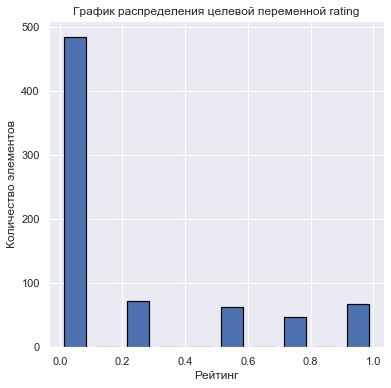

In [83]:
rcParams['figure.figsize'] = 6,6

df_scaled.rating.hist(edgecolor='black', linewidth=1.2, align='mid', rwidth=0.7)

plt.title('График распределения целевой переменной rating')
plt.xlabel('Рейтинг')
plt.ylabel('Количество элементов')
plt.grid(True)

Вывод: для линейной модели имеет смысл выбирать признаки, которые имеют высокую корреляцию с целевой переменной rating (например, более 85% по абсолютному значению). В данном примере только два признака имеют корреляцию около 55%. 

Также следует обратить внимание, что целевая переменная rating имеет дискретное распределение (Бернулли), а также количество классов несбалансированное. В этом случае модель линейной регрессии может показывать большую ошибку.

Поскольку в задании не сказано про исключение признаков, ничего не удаляю. Был удален только жанр "unknown" из датафрейма merged_df.

In [84]:
# Разделение датасета df_scaled на тестовую и обучающую выборки:

output_y = df_scaled.rating
input_x = df_scaled.loc[:, 'Year':]

In [85]:
X_train_17, X_test_17, y_train_17, y_test_17 = train_test_split(input_x, output_y, train_size=0.7, random_state=17)

In [86]:
X_train_17.shape, len(y_train_17)

X_test_17.shape, len(y_test_17)

((515, 22), 515)

((222, 22), 222)

**2.6. Возьмите модель линейной регрессии (или любую другую для задачи регрессии) и обучите ее на фильмах.**

In [87]:
lr_model = LinearRegression().fit(X_train_17, y_train_17)

print('intercept:', lr_model.intercept_)
print('slope:', lr_model.coef_)

intercept: 0.23901236902579281
slope: [-0.25282554 -1.2106717   2.37808452  0.01454952 -0.04549182 -0.11244684
 -0.06581044  0.08586038  0.03132139  0.06481964  0.06806812  0.00819176
 -0.03754946 -0.1792667   0.01290084  0.13490953 -0.03168039  0.01348258
 -0.02607177  0.0367827  -0.14699166  0.11583241]


In [88]:
print(f'train_score: {lr_model.score(X_train_17, y_train_17) }')

train_score: 0.36308478283046136


**2.7. Оцените качество модели на X_test, y_test при помощи метрик для задачи регрессии.**

In [89]:
predictions = lr_model.predict(X_test_17)

In [90]:
print(f'r2_score: {r2_score(y_test_17, predictions)}')
print(f'mae: {mean_absolute_error(y_test_17, predictions)}')
print(f'mse: {mean_squared_error(y_test_17, predictions)}')

r2_score: 0.24869075241832006
mae: 0.22580080015139053
mse: 0.0930647286340848


In [91]:
controls_df = y_test_17.to_frame(name='y_test_17').reset_index()
controls_df['predictions'] = predictions

controls_df['model_error_abs'] = abs(round(controls_df['predictions'] - controls_df['y_test_17'], 3))
controls_df

,index,y_test_17,predictions,model_error_abs
0,25,0.50,0.074533,0.425
1,54,0.00,0.064339,0.064
2,169,0.00,0.006769,0.007
3,151,0.00,0.509394,0.509
4,386,0.75,0.070034,0.680
5,662,0.00,0.078955,0.079
6,438,0.00,0.178048,0.178
7,355,0.75,0.430259,0.320
8,165,0.00,0.215902,0.216
9,286,0.00,0.024902,0.025


Text(0.5, 1.0, 'Точечный график зависимости двух выборок predictions и y_test_17 (plt.scatter) для модели LinearRegression')

Text(0.5, 0, 'predictions')

Text(0, 0.5, 'y_test_17')

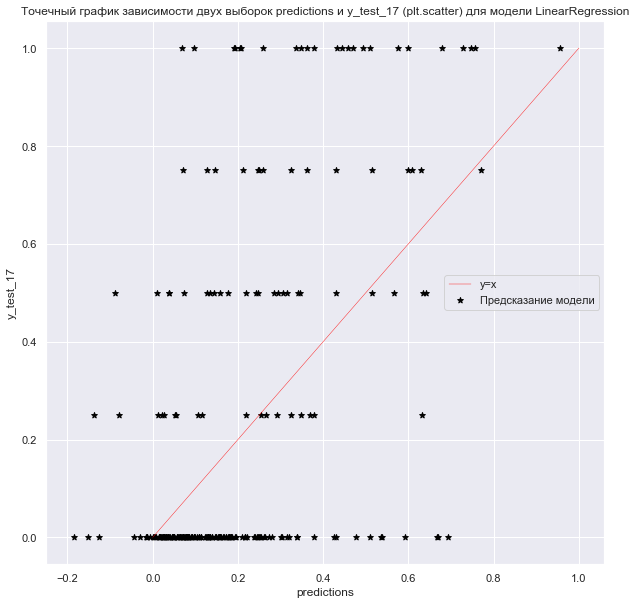

In [92]:
rcParams['figure.figsize'] = 10,10
plt.scatter(controls_df['predictions'], controls_df['y_test_17'], color="black", marker="*", label='Предсказание модели')

x = [0, 1]
y = [0, 1]

plt.plot(x, y, color="red", linewidth=0.4, label='y=x')

plt.title('Точечный график зависимости двух выборок predictions и y_test_17 (plt.scatter) для модели LinearRegression')
plt.xlabel('predictions')
plt.ylabel('y_test_17')
plt.grid(True)
plt.legend()

**2.8. Загрузить данные в spark.**

**Установка PySpark.**

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz

In [3]:
!tar -xvf spark-2.4.4-bin-hadoop2.7.tgz

spark-2.4.4-bin-hadoop2.7/
spark-2.4.4-bin-hadoop2.7/R/
spark-2.4.4-bin-hadoop2.7/R/lib/
spark-2.4.4-bin-hadoop2.7/R/lib/sparkr.zip
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/R.css
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/00Index.html
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/aliases.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/AnIndex
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdx
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdb
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/paths.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/te

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [12]:
data_df = spark.read.csv('u.data.csv', inferSchema=True, sep='\t', header=False)
data_df.show(5)

+---+---+---+---------+
|_c0|_c1|_c2|      _c3|
+---+---+---+---------+
|196|242|  3|881250949|
|186|302|  3|891717742|
| 22|377|  1|878887116|
|244| 51|  2|880606923|
|166|346|  1|886397596|
+---+---+---+---------+
only showing top 5 rows



In [13]:
# переименуем столбцы
data_df = data_df.withColumnRenamed('_c0', 'user_id').withColumnRenamed('_c1', 'item_id').withColumnRenamed('_c2', 'rating').withColumnRenamed('_c3', 'timestamp')
data_df.show(5)

+-------+-------+------+---------+
|user_id|item_id|rating|timestamp|
+-------+-------+------+---------+
|    196|    242|     3|881250949|
|    186|    302|     3|891717742|
|     22|    377|     1|878887116|
|    244|     51|     2|880606923|
|    166|    346|     1|886397596|
+-------+-------+------+---------+
only showing top 5 rows



In [14]:
item_df = spark.read.csv('u.item.csv', inferSchema=True, sep='|', encoding = "ISO-8859-1", header=False)
item_df.show(5)

+---+-----------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|              _c1|        _c2| _c3|                 _c4|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|
+---+-----------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|  1| Toy Story (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  0|  0|  1|  1|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
|  2| GoldenEye (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  1|  1|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  3|Four Rooms (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  0|  0|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  4|Get Shorty (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  1|  0|  0|  0|   1|  

In [15]:
# переименуем столбцы
item_df = item_df.withColumnRenamed('_c0', 'item_id').withColumnRenamed('_c5', 'unknown').withColumnRenamed('_c6', 'Action').withColumnRenamed('_c7', 'Adventure').withColumnRenamed('_c8', 'Animation').withColumnRenamed('_c9', "Children's").withColumnRenamed('_c10', 'Comedy').withColumnRenamed('_c11', 'Crime').withColumnRenamed('_c12', 'Documentary').withColumnRenamed('_c13', 'Drama').withColumnRenamed('_c14', 'Fantasy').withColumnRenamed('_c15', 'Film-Noir').withColumnRenamed('_c16', 'Horror').withColumnRenamed('_c17', 'Musical').withColumnRenamed('_c18', 'Mystery').withColumnRenamed('_c19', 'Romance').withColumnRenamed('_c20', 'Sci-Fi').withColumnRenamed('_c21', 'Thriller').withColumnRenamed('_c22', 'War').withColumnRenamed('_c23', 'Western')
item_df.show(5)

+-------+-----------------+-----------+----+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|item_id|              _c1|        _c2| _c3|                 _c4|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+-------+-----------------+-----------+----+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|      1| Toy Story (1995)|01-Jan-1995|null|http://us.imdb.co...|      0|     0|        0|        1|         1|     1|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|       0|  0|      0|
|      2| GoldenEye (1995)|01-Jan-1995|null|http://us.imdb.co...|      0|     1|        1|        0|         0|     0|  

**2.9. Средствами спарка вывести среднюю оценку для каждого фильма.**

In [0]:
data_df_filtered = data_df.select('item_id', 'rating')

In [0]:
data_df_filtered = data_df_filtered.groupBy('item_id').avg('rating').withColumnRenamed('avg(rating)', 'Average_rating')

In [32]:
data_df_filtered.orderBy('Average_rating', ascending=False).show(100)

+-------+------------------+
|item_id|    Average_rating|
+-------+------------------+
|   1500|               5.0|
|   1189|               5.0|
|   1653|               5.0|
|   1536|               5.0|
|   1599|               5.0|
|   1293|               5.0|
|    814|               5.0|
|   1201|               5.0|
|   1467|               5.0|
|   1122|               5.0|
|   1449|             4.625|
|   1398|               4.5|
|   1642|               4.5|
|    119|               4.5|
|   1594|               4.5|
|    408| 4.491071428571429|
|    318| 4.466442953020135|
|    169| 4.466101694915254|
|    483|  4.45679012345679|
|    114| 4.447761194029851|
|     64| 4.445229681978798|
|    603|4.3875598086124405|
|     12| 4.385767790262173|
|     50|4.3584905660377355|
|    178|             4.344|
|    513| 4.333333333333333|
|   1191| 4.333333333333333|
|   1639| 4.333333333333333|
|    134| 4.292929292929293|
|    963|4.2926829268292686|
|    427| 4.292237442922374|
|    357| 4.29

**2.10. Посчитайте средствами спарка среднюю оценку для каждого жанра.**

In [36]:
joined_df = item_df.join(data_df_filtered, 'item_id', how='left')
joined_df.show(3)

+-------+-----------------+-----------+----+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+------------------+
|item_id|              _c1|        _c2| _c3|                 _c4|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|    Average_rating|
+-------+-----------------+-----------+----+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+------------------+
|      1| Toy Story (1995)|01-Jan-1995|null|http://us.imdb.co...|      0|     0|        0|        1|         1|     1|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|       0|  0|      0|3.8783185840707963|
|      2| GoldenEye (1995)|01-Jan-1995|null|

In [42]:
unknown_genre = joined_df.select('unknown', 'Average_rating').where(joined_df['unknown'] == 1)
unknown_genre.groupBy('unknown').avg('Average_rating').show()

+-------+-------------------+
|unknown|avg(Average_rating)|
+-------+-------------------+
|      1| 2.2222222222222223|
+-------+-------------------+



In [43]:
Action_genre = joined_df.select('Action', 'Average_rating').where(joined_df['Action'] == 1)
Action_genre.groupBy('Action').avg('Average_rating').show()

+------+-------------------+
|Action|avg(Average_rating)|
+------+-------------------+
|     1|  2.966332403758986|
+------+-------------------+

